In [16]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten

In [18]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [19]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


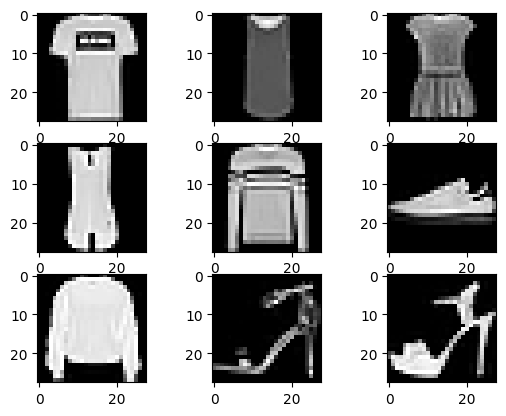

In [20]:
for i in range(1, 10):
   
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
     
    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

In [21]:
def model_arch():
  models = Sequential()
  
  models.add(Conv2D(64,(5,5),
                    padding = "same",
                    activation = "relu",
                    input_shape = (28,28,1)))
  models.add(MaxPooling2D(pool_size = (2,2)))
  models.add(Conv2D(128,(5,5), padding ="same", activation = "relu"))
  models.add(MaxPooling2D(pool_size = (2,2)))
  models.add(Conv2D(256,(5,5), padding ="same", activation = "relu"))
  models.add(MaxPooling2D(pool_size=(2, 2)))
  models.add(Flatten())
  models.add(Dense(256, activation="relu"))
  models.add(Dense(10, activation="softmax"))
  return models

In [22]:
model = model_arch()
 
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 256)       

In [23]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 616s 6s/step - loss: 2.8510 - sparse_categorical_accuracy: 0.7064 - val_loss: 0.4291 - val_sparse_categorical_accuracy: 0.8430
Epoch 2/10
100/100 [==============================] - 618s 6s/step - loss: 0.3699 - sparse_categorical_accuracy: 0.8647 - val_loss: 0.3514 - val_sparse_categorical_accuracy: 0.8715
Epoch 3/10
100/100 [==============================] - 619s 6s/step - loss: 0.3061 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.3113 - val_sparse_categorical_accuracy: 0.8868
Epoch 4/10
100/100 [==============================] - 621s 6s/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9028 - val_loss: 0.2980 - val_sparse_categorical_accuracy: 0.8921
Epoch 5/10
100/100 [==============================] - 620s 6s/step - loss: 0.2389 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.2995 - val_sparse_categorical_accuracy: 0.8904
Epoch 6/10
100/100 [==============================] - 618s 6s/step - loss: 0.2153 - sparse_cate

In [25]:
model.save_weights('./model.h5', overwrite=True)

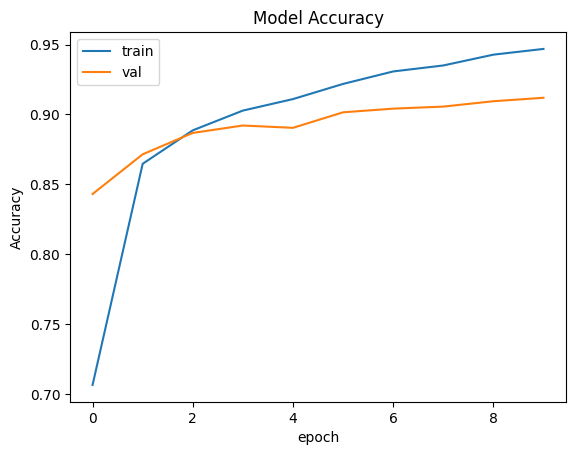

In [26]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

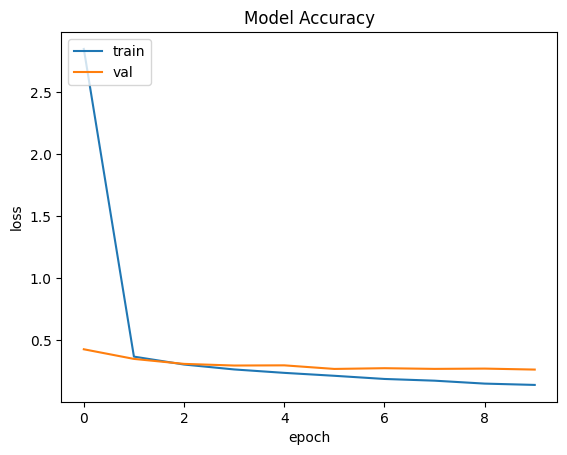

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 128ms/step
ankle_boots


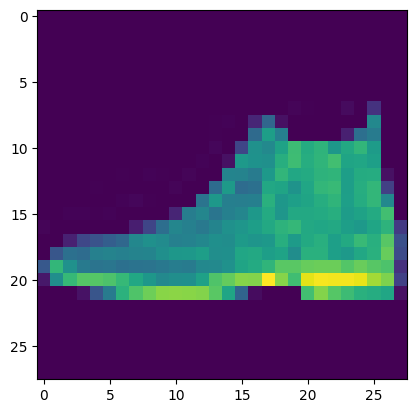

In [28]:

# There are 10 output labels for the
# Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover',
          'dress', 'coat', 'sandal', 'shirt',
          'sneaker', 'bag', 'ankle_boots']
 
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]
 
print(label)
plt.imshow(testX[:1][0])
plt.show()